In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
# --- Metrics ---
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Read data

In [3]:
df = pd.read_csv("df_final_bh_amazonas.csv")

In [4]:
df.head(10)

,Date,DayOfWeek,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,IsDayAfterHoliday,temp_max,temp_min,temp_mean,humidity_max,humidity_min,NUMBER_INT,CO,MP10,O3,MP2.5,SO2
0,2015-01-01,Thu,3,1,1,0,1,0,33.9,20.6,25.912500,89.0,32.0,30,0.0,NaN,68.0,NaN,82.0
1,2015-01-02,Fri,4,1,1,0,0,1,32.9,21.0,26.050000,87.0,38.0,43,0.0,NaN,79.0,NaN,83.0
2,2015-01-03,Sat,5,1,1,1,0,0,33.5,20.2,26.683333,83.0,38.0,23,0.0,NaN,44.0,NaN,83.0
3,2015-01-04,Sun,6,1,1,1,0,0,30.6,22.2,25.641667,81.0,43.0,20,0.0,NaN,49.0,NaN,82.0
4,2015-01-05,Mon,0,2,1,0,0,0,30.8,20.8,25.520833,79.0,36.0,51,0.0,NaN,59.0,NaN,82.0
5,2015-01-06,Tue,1,2,1,0,0,0,29.5,20.5,25.016667,79.0,41.0,23,0.0,NaN,54.0,NaN,82.0
6,2015-01-07,Wed,2,2,1,0,0,0,28.0,19.9,23.925000,78.0,44.0,43,0.0,NaN,54.0,NaN,82.0
7,2015-01-08,Thu,3,2,1,0,0,0,30.4,19.7,24.229167,74.0,30.0,49,NaN,NaN,66.0,NaN,82.0
8,2015-01-09,Fri,4,2,1,0,0,0,30.5,19.6,24.579167,68.0,28.0,39,NaN,NaN,61.0,NaN,82.0
9,2015-01-10,Sat,5,2,1,1,0,0,32.6,20.6,25.887500,73.0,33.0,19,NaN,NaN,51.0,NaN,82.0


In [5]:
df.tail(10)

,Date,DayOfWeek,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,IsDayAfterHoliday,temp_max,temp_min,temp_mean,humidity_max,humidity_min,NUMBER_INT,CO,MP10,O3,MP2.5,SO2
1816,2019-12-22,Sun,6,51,12,1,0,0,32.9,20.3,26.037500,84.0,34.0,34,0.0,14.0,NaN,7.0,NaN
1817,2019-12-23,Mon,0,52,12,0,0,0,25.9,19.0,22.291667,91.0,59.0,47,NaN,14.0,NaN,7.0,NaN
1818,2019-12-24,Tue,1,52,12,0,0,0,24.6,17.6,21.175000,91.0,65.0,37,NaN,13.0,NaN,6.0,NaN
1819,2019-12-25,Wed,2,52,12,0,1,0,30.3,17.4,23.525000,91.0,36.0,59,NaN,8.0,NaN,6.0,NaN
1820,2019-12-26,Thu,3,52,12,0,0,1,30.4,20.8,25.000000,79.0,37.0,71,NaN,9.0,NaN,5.0,NaN
1821,2019-12-27,Fri,4,52,12,0,0,0,29.1,19.9,24.016667,83.0,40.0,48,NaN,9.0,NaN,6.0,NaN
1822,2019-12-28,Sat,5,52,12,1,0,0,28.6,19.7,23.245833,88.0,44.0,39,NaN,10.0,NaN,6.0,NaN
1823,2019-12-29,Sun,6,52,12,1,0,0,29.4,18.8,22.333333,90.0,40.0,36,NaN,8.0,NaN,5.0,NaN
1824,2019-12-30,Mon,0,1,12,0,0,0,29.3,18.1,22.958333,84.0,32.0,41,NaN,8.0,NaN,5.0,NaN
1825,2019-12-31,Tue,1,1,12,0,0,0,29.9,18.8,24.045833,79.0,37.0,49,NaN,8.0,NaN,5.0,NaN


In [6]:
df.count()

Date                 1826
DayOfWeek            1826
DayOfWeekNum         1826
WeekOfYear           1826
Month                1826
IsWeekend            1826
IsHoliday            1826
IsDayAfterHoliday    1826
temp_max             1826
temp_min             1826
temp_mean            1826
humidity_max         1826
humidity_min         1826
NUMBER_INT           1826
CO                   1581
MP10                 1457
O3                   1265
MP2.5                1195
SO2                  1091
dtype: int64

### Set features

In [7]:
selected_cols_final = [
    'Date',
    'DayOfWeekNum',
    'WeekOfYear',
    'Month',
    'IsWeekend',
    'IsHoliday',
    'NUMBER_INT',
    'MP10',
    'temp_max',
    'temp_min',
    'humidity_max',
]

df_final = df[selected_cols_final].copy()

In [8]:
# add lag

df_final['MP10_lag1'] = df_final['MP10'].shift(1)
df_final['MP10_lag2'] = df_final['MP10'].shift(2)
df_final['MP10_lag3'] = df_final['MP10'].shift(3)

df_final['temp_min_lag1'] = df_final['temp_min'].shift(1)
df_final['temp_min_lag2'] = df_final['temp_min'].shift(2)
df_final['temp_min_lag3'] = df_final['temp_min'].shift(3)

# df_final['humidity_max_lag1'] = df_final['humidity_max'].shift(1)
# df_final['humidity_max_lag2'] = df_final['humidity_max'].shift(2)
# df_final['humidity_max_lag3'] = df_final['humidity_max'].shift(3)

In [9]:
df_final = df_final.dropna()

In [10]:
# Check non-null counts and data types
df_final.info()

# Check descriptive statistics
df_final.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 14 to 1825
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1300 non-null   object 
 1   DayOfWeekNum   1300 non-null   int64  
 2   WeekOfYear     1300 non-null   int64  
 3   Month          1300 non-null   int64  
 4   IsWeekend      1300 non-null   int64  
 5   IsHoliday      1300 non-null   int64  
 6   NUMBER_INT     1300 non-null   int64  
 7   MP10           1300 non-null   float64
 8   temp_max       1300 non-null   float64
 9   temp_min       1300 non-null   float64
 10  humidity_max   1300 non-null   float64
 11  MP10_lag1      1300 non-null   float64
 12  MP10_lag2      1300 non-null   float64
 13  MP10_lag3      1300 non-null   float64
 14  temp_min_lag1  1300 non-null   float64
 15  temp_min_lag2  1300 non-null   float64
 16  temp_min_lag3  1300 non-null   float64
dtypes: float64(10), int64(6), object(1)
memory usage: 182.8+

,Date,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,MP10,temp_max,temp_min,humidity_max,MP10_lag1,MP10_lag2,MP10_lag3,temp_min_lag1,temp_min_lag2,temp_min_lag3
count,1300,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
unique,1300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.006154,26.920769,6.584615,0.287692,0.021538,48.214615,20.342308,28.260462,17.599154,82.307692,20.325385,20.292308,20.256154,17.591769,17.595154,17.576462
std,NaN,2.004988,13.905732,3.178509,0.452861,0.145227,15.901814,10.170020,3.042062,2.725500,9.281954,10.076817,9.989406,10.107265,2.749061,2.764136,2.755145
min,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,11.000000,4.000000,19.100000,7.700000,42.000000,4.000000,4.000000,4.000000,7.700000,7.700000,7.700000
25%,NaN,1.000000,15.000000,4.000000,0.000000,0.000000,36.000000,14.000000,26.200000,15.800000,77.000000,14.000000,14.000000,14.000000,15.700000,15.700000,15.700000
50%,NaN,3.000000,27.000000,7.000000,0.000000,0.000000,47.000000,18.000000,28.400000,18.100000,84.000000,18.000000,18.000000,18.000000,18.100000,18.100000,18.100000
75%,NaN,5.000000,38.000000,9.000000,1.000000,0.000000,59.000000,25.000000,30.400000,19.600000,90.000000,25.000000,25.000000,25.000000,19.600000,19.600000,19.600000


In [11]:
df_final.dtypes

Date              object
DayOfWeekNum       int64
WeekOfYear         int64
Month              int64
IsWeekend          int64
IsHoliday          int64
NUMBER_INT         int64
MP10             float64
temp_max         float64
temp_min         float64
humidity_max     float64
MP10_lag1        float64
MP10_lag2        float64
MP10_lag3        float64
temp_min_lag1    float64
temp_min_lag2    float64
temp_min_lag3    float64
dtype: object

## Train

In [12]:
df_final['Date'] = pd.to_datetime(df_final['Date'])
# df_final = df_final.sort_values(by='Date')

# remove the last 5 days (account for lag ...)
# df_final = df_final[:-5]

# Range for training and testing (4 years for training, 1 year for validation)
min_year = df_final['Date'].dt.year.min()
train_mask = df_final['Date'].dt.year < (min_year + 4)
val_mask = df_final['Date'].dt.year == (min_year + 4)



df_train = df_final[train_mask]
df_val = df_final[val_mask]

df_train = df_train.drop(columns=['Date'])
df_val = df_val.drop(columns=['Date'])

X = df_final.drop(columns=['Date', 'NUMBER_INT'])
y = df_final['NUMBER_INT']


X_train = df_train.drop(columns=['NUMBER_INT'])
y_train = df_train['NUMBER_INT']

X_val = df_val.drop(columns=['NUMBER_INT'])
y_val = df_val['NUMBER_INT']

In [13]:
df_train.head()

,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,MP10,temp_max,temp_min,humidity_max,MP10_lag1,MP10_lag2,MP10_lag3,temp_min_lag1,temp_min_lag2,temp_min_lag3
14,3,3,1,0,0,40,24.0,30.1,20.1,67.0,26.0,26.0,26.0,21.8,21.4,19.7
15,4,3,1,0,0,36,25.0,32.4,20.9,65.0,24.0,26.0,26.0,20.1,21.8,21.4
16,5,3,1,1,0,31,22.0,32.1,20.4,62.0,25.0,24.0,26.0,20.9,20.1,21.8
17,6,3,1,1,0,21,19.0,32.9,18.5,72.0,22.0,25.0,24.0,20.4,20.9,20.1
18,0,4,1,0,0,37,24.0,32.6,21.2,61.0,19.0,22.0,25.0,18.5,20.4,20.9


In [14]:
df_train.tail()

,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,MP10,temp_max,temp_min,humidity_max,MP10_lag1,MP10_lag2,MP10_lag3,temp_min_lag1,temp_min_lag2,temp_min_lag3
1444,5,50,12,1,0,40,13.0,32.0,21.4,66.0,16.0,20.0,11.0,19.9,18.8,19.5
1449,3,51,12,0,0,57,18.0,33.5,20.4,88.0,22.0,20.0,12.0,21.5,20.4,20.6
1450,4,51,12,0,0,55,22.0,32.0,21.0,87.0,18.0,22.0,20.0,20.4,21.5,20.4
1451,5,51,12,1,0,48,26.0,33.1,19.0,91.0,22.0,18.0,22.0,21.0,20.4,21.5
1452,6,51,12,1,0,49,18.0,32.6,17.9,92.0,26.0,22.0,18.0,19.0,21.0,20.4


In [15]:
df_val.head(10)

,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,MP10,temp_max,temp_min,humidity_max,MP10_lag1,MP10_lag2,MP10_lag3,temp_min_lag1,temp_min_lag2,temp_min_lag3
1464,4,1,1,0,0,37,18.0,25.4,19.0,91.0,20.0,14.0,10.0,20.4,18.9,19.2
1465,5,1,1,1,0,36,21.0,30.1,18.6,91.0,18.0,20.0,14.0,19.0,20.4,18.9
1466,6,1,1,1,0,30,14.0,31.8,18.8,90.0,21.0,18.0,20.0,18.6,19.0,20.4
1467,0,2,1,0,0,37,10.0,31.2,20.9,79.0,14.0,21.0,18.0,18.8,18.6,19.0
1468,1,2,1,0,0,39,12.0,29.6,19.7,87.0,10.0,14.0,21.0,20.9,18.8,18.6
1469,2,2,1,0,0,49,9.0,29.4,19.0,78.0,12.0,10.0,14.0,19.7,20.9,18.8
1478,4,3,1,0,0,40,14.0,32.5,20.4,81.0,19.0,17.0,11.0,21.1,22.4,21.1
1479,5,3,1,1,0,28,9.0,32.7,21.8,71.0,14.0,19.0,17.0,20.4,21.1,22.4
1480,6,3,1,1,0,27,11.0,33.3,20.3,90.0,9.0,14.0,19.0,21.8,20.4,21.1
1481,0,4,1,0,0,40,11.0,30.6,21.2,91.0,11.0,9.0,14.0,20.3,21.8,20.4


In [16]:
df_val.tail(20)

,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,MP10,temp_max,temp_min,humidity_max,MP10_lag1,MP10_lag2,MP10_lag3,temp_min_lag1,temp_min_lag2,temp_min_lag3
1806,3,50,12,0,0,50,18.0,27.2,19.1,92.0,26.0,18.0,10.0,19.4,19.7,18.3
1807,4,50,12,0,0,44,18.0,31.3,18.5,92.0,18.0,26.0,18.0,19.1,19.4,19.7
1808,5,50,12,1,0,43,11.0,30.2,18.9,88.0,18.0,18.0,26.0,18.5,19.1,19.4
1809,6,50,12,1,0,28,7.0,29.0,20.2,77.0,11.0,18.0,18.0,18.9,18.5,19.1
1810,0,51,12,0,0,49,8.0,30.0,18.7,77.0,7.0,11.0,18.0,20.2,18.9,18.5
1811,1,51,12,0,0,49,11.0,31.2,20.3,78.0,8.0,7.0,11.0,18.7,20.2,18.9
1812,2,51,12,0,0,52,14.0,32.4,20.8,70.0,11.0,8.0,7.0,20.3,18.7,20.2
1813,3,51,12,0,0,67,14.0,30.5,19.9,89.0,14.0,11.0,8.0,20.8,20.3,18.7
1814,4,51,12,0,0,57,14.0,30.7,19.7,88.0,14.0,14.0,11.0,19.9,20.8,20.3
1815,5,51,12,1,0,34,16.0,29.2,20.0,91.0,14.0,14.0,14.0,19.7,19.9,20.8


## Test (10x with cv)

In [17]:
results = []
results30 = []

param_grid = {
    'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160],
    'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16],
}

In [18]:
for i in range(10):
    grid_search = GridSearchCV(
        estimator=RandomForestRegressor(random_state=i),
        param_grid=param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    print(f"\nRun {i+1} Best Hyperparameters:")
    print("Best Hyperparameters:", grid_search.best_params_)
    print(f"Best R-squared: {grid_search.best_score_:.4f}")

    best_xgb_model = grid_search.best_estimator_
    y_pred = best_xgb_model.predict(X_val)

    # Metrics 1y
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_pred)
    mape_val = mape(y_val, y_pred)
    smape_val = smape(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    corr = np.corrcoef(y_val, y_pred)[0, 1]

    # Metrics 30d
    y_pred_30d = best_xgb_model.predict(X_val[:30])
    y_val_30 = y_val[:30]
    mse_30d = mean_squared_error(y_val_30, y_pred_30d)
    rmse_30d = np.sqrt(mse_30d)
    mae_30d = mean_absolute_error(y_val_30, y_pred_30d)
    mape_val_30d = mape(y_val_30, y_pred_30d)
    smape_val_30d = smape(y_val_30, y_pred_30d)
    r2_30d = r2_score(y_val_30, y_pred_30d)
    corr_30d = np.corrcoef(y_val_30, y_pred_30d)[0, 1]

    results.append({
        'run': i+1,
        'random_state': i,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape_val,
        'sMAPE': smape_val,
        'R2': r2,
        'Correlation': corr,
        'Best Params': grid_search.best_params_,
        'Best Cross-validated R-squared': grid_search.best_score_
    })

    results30.append({
        'run': i+1,
        'random_state': i,
        'MSE_30d': mse_30d,
        'RMSE_30d': rmse_30d,
        'MAE_30d': mae_30d,
        'MAPE_30d': mape_val_30d,
        'sMAPE_30d': smape_val_30d,
        'R2_30d': r2_30d,
        'Correlation_30d': corr_30d
    })




Run 1 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 16, 'n_estimators': 120}
Best R-squared: 0.5346

Run 2 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 14, 'n_estimators': 120}
Best R-squared: 0.5334

Run 3 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 16, 'n_estimators': 160}
Best R-squared: 0.5370

Run 4 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 16, 'n_estimators': 140}
Best R-squared: 0.5350

Run 5 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 14, 'n_estimators': 20}
Best R-squared: 0.5349

Run 6 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 16, 'n_estimators': 100}
Best R-squared: 0.5361

Run 7 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 20}
Best R-squared: 0.5292

Run 8 Best Hyperparameters:
Best Hyperparam

### Results 1y

In [19]:
results_df = pd.DataFrame(results)
results_df

,run,random_state,MSE,RMSE,MAE,MAPE,sMAPE,R2,Correlation,Best Params,Best Cross-validated R-squared
0,1,0,131.708519,11.476433,8.708420,16.593237,17.941487,0.459476,0.778396,"{'max_depth': 6, 'min_samples_split': 16, 'n_e...",0.534648
1,2,1,132.499212,11.510830,8.710041,16.540075,17.899661,0.456231,0.776603,"{'max_depth': 6, 'min_samples_split': 14, 'n_e...",0.533442
2,3,2,131.663428,11.474469,8.707112,16.536719,17.893927,0.459661,0.780158,"{'max_depth': 6, 'min_samples_split': 16, 'n_e...",0.537025
3,4,3,131.048936,11.447661,8.678961,16.444355,17.785110,0.462183,0.779650,"{'max_depth': 6, 'min_samples_split': 16, 'n_e...",0.535038
4,5,4,134.036518,11.577414,8.806881,16.728873,18.144093,0.449922,0.775461,"{'max_depth': 6, 'min_samples_split': 14, 'n_e...",0.534937
5,6,5,129.607215,11.384516,8.622488,16.353712,17.675231,0.468100,0.781901,"{'max_depth': 6, 'min_samples_split': 16, 'n_e...",0.536127
6,7,6,130.111027,11.406622,8.700849,16.363421,17.694863,0.466032,0.785115,"{'max_depth': 4, 'min_samples_split': 2, 'n_es...",0.529244
7,8,7,131.179673,11.453370,8.684590,16.486256,17.818293,0.461646,0.779981,"{'max_depth': 6, 'min_samples_split': 16, 'n_e...",0.533452
8,9,8,130.954828,11.443550,8.691338,16.528709,17.885383,0.462569,0.779455,"{'max_depth': 6, 'min_samples_split': 16, 'n_e...",0.533512
9,10,9,129.572077,11.382973,8.673877,16.489290,17.797975,0.468244,0.783861,"{'max_depth': 6, 'min_samples_split': 16, 'n_e...",0.533048


In [20]:
results_df.describe()

,run,random_state,MSE,RMSE,MAE,MAPE,sMAPE,R2,Correlation,Best Cross-validated R-squared
count,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,4.50000,131.238143,11.455784,8.698456,16.506465,17.853602,0.461406,0.780058,0.534048
std,3.02765,3.02765,1.360102,0.059272,0.046029,0.109489,0.134542,0.005582,0.002978,0.002119
min,1.00000,0.00000,129.572077,11.382973,8.622488,16.353712,17.675231,0.449922,0.775461,0.529244
25%,3.25000,2.25000,130.321978,11.415854,8.680368,16.454830,17.788326,0.459522,0.778661,0.533445
50%,5.50000,4.50000,131.114305,11.450515,8.696094,16.509000,17.851838,0.461915,0.779815,0.534080
75%,7.75000,6.75000,131.697246,11.475942,8.708093,16.539236,17.898228,0.465166,0.781466,0.535013
max,10.00000,9.00000,134.036518,11.577414,8.806881,16.728873,18.144093,0.468244,0.785115,0.537025


### results 30d

In [21]:
results_df_30 = pd.DataFrame(results30)
results_df_30

,run,random_state,MSE_30d,RMSE_30d,MAE_30d,MAPE_30d,sMAPE_30d,R2_30d,Correlation_30d
0,1,0,138.698882,11.777049,8.965647,20.806090,24.309575,-0.536092,0.433609
1,2,1,138.820914,11.782229,8.912113,20.558809,24.092832,-0.537444,0.446262
2,3,2,134.871232,11.613407,8.792583,20.363646,23.778023,-0.493701,0.456760
3,4,3,134.183284,11.583751,8.690904,20.063239,23.468207,-0.486082,0.451648
4,5,4,136.151305,11.668389,8.856718,20.580719,24.165382,-0.507878,0.476245
5,6,5,136.495555,11.683131,8.856465,20.433691,23.861009,-0.511690,0.451872
6,7,6,123.723595,11.123111,8.515943,19.854726,22.883446,-0.370241,0.478321
7,8,7,138.639432,11.774525,8.934268,20.688345,24.227773,-0.535434,0.449387
8,9,8,139.429144,11.808012,8.994686,20.773430,24.319807,-0.544180,0.438883
9,10,9,129.365148,11.373880,8.674252,20.151613,23.398019,-0.432721,0.483097


In [22]:
results_df_30.describe()

,run,random_state,MSE_30d,RMSE_30d,MAE_30d,MAPE_30d,sMAPE_30d,R2_30d,Correlation_30d
count,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,4.50000,135.037849,11.618748,8.819358,20.427431,23.850407,-0.495546,0.456608
std,3.02765,3.02765,4.992041,0.217397,0.151678,0.318458,0.474067,0.055287,0.017023
min,1.00000,0.00000,123.723595,11.123111,8.515943,19.854726,22.883446,-0.544180,0.433609
25%,3.25000,2.25000,134.355271,11.591165,8.716323,20.204621,23.545661,-0.535928,0.447043
50%,5.50000,4.50000,136.323430,11.675760,8.856591,20.496250,23.976920,-0.509784,0.451760
75%,7.75000,6.75000,138.684019,11.776418,8.928729,20.661439,24.212175,-0.487987,0.471374
max,10.00000,9.00000,139.429144,11.808012,8.994686,20.806090,24.319807,-0.370241,0.483097


## Plots    

In [23]:
best_idx = results_df['RMSE'].idxmin()
print(f"Best run based on RMSE: Run {results_df.loc[best_idx, 'run']} with RMSE = {results_df.loc[best_idx, 'RMSE']:.2f}")

best_params = results_df.loc[best_idx, 'Best Params']
print(f"Best parameters: {best_params}")

best_random_state = results_df.loc[best_idx, 'run'] - 1 

# Rebuild the best model
best_model = RandomForestRegressor(random_state=best_random_state, **best_params)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_val)


Best run based on RMSE: Run 10 with RMSE = 11.38
Best parameters: {'max_depth': 6, 'min_samples_split': 16, 'n_estimators': 20}


### 1y

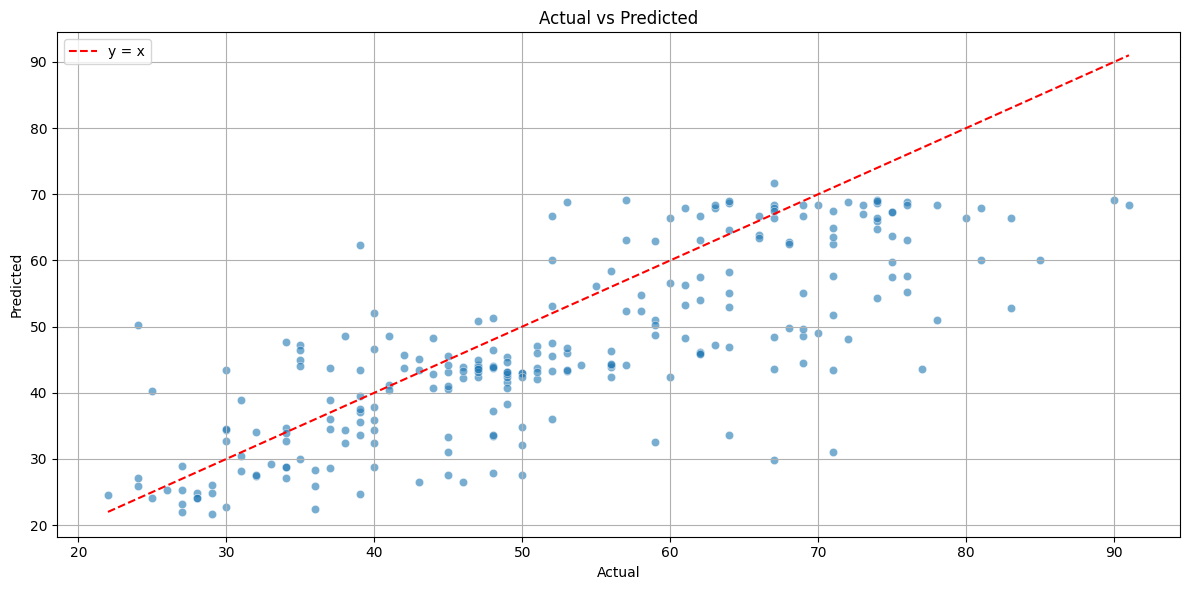

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_val[:], y=y_pred_best, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', label='y = x')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

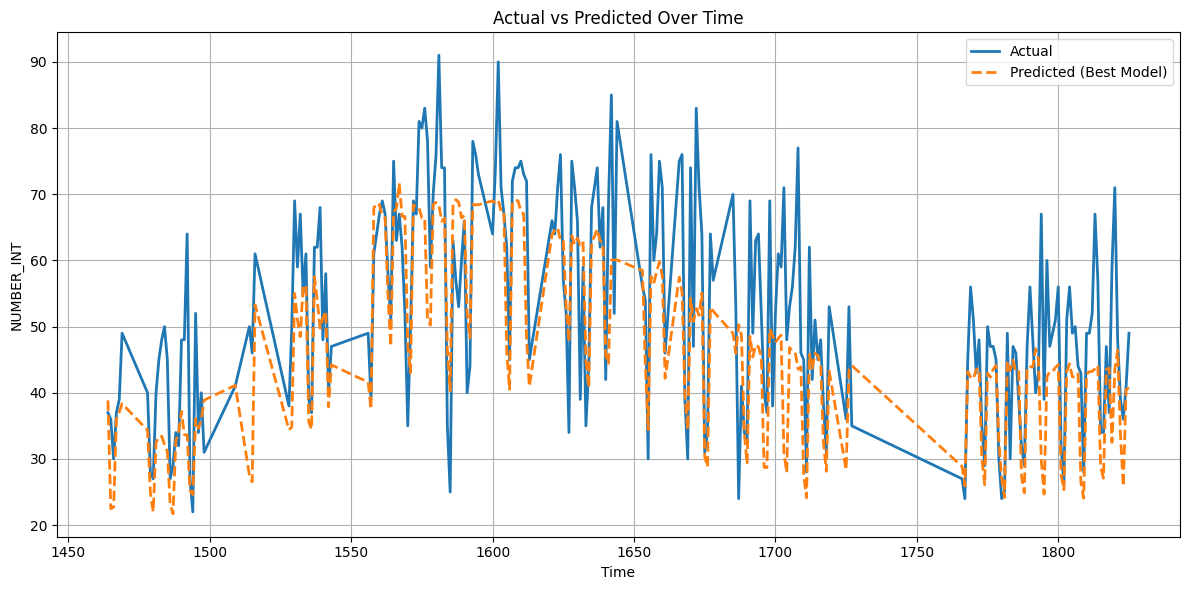

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(y_val.index, y_val.values, label='Actual', linewidth=2)
plt.plot(y_val.index, y_pred_best, label='Predicted (Best Model)', linewidth=2, linestyle='--')
plt.xlabel('Time')
plt.ylabel('NUMBER_INT')
plt.title(f'Actual vs Predicted Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 30d

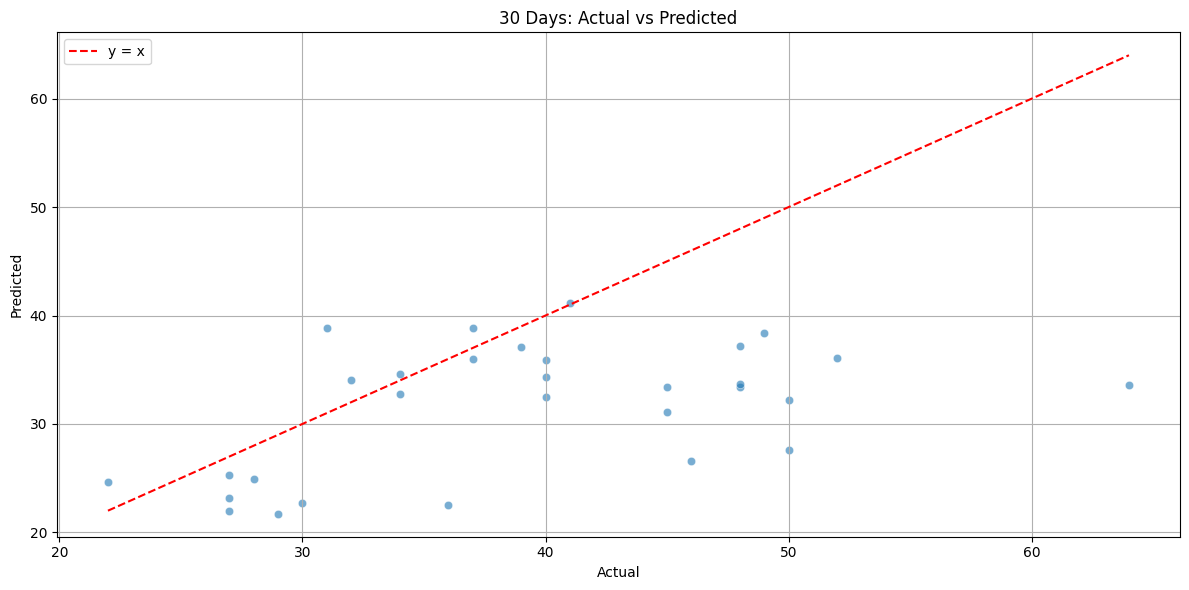

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_val[:30], y=y_pred_best[:30], alpha=0.6)
plt.plot([y_val[:30].min(), y_val[:30].max()], [y_val[:30].min(), y_val[:30].max()], color='red', linestyle='--', label='y = x')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('30 Days: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


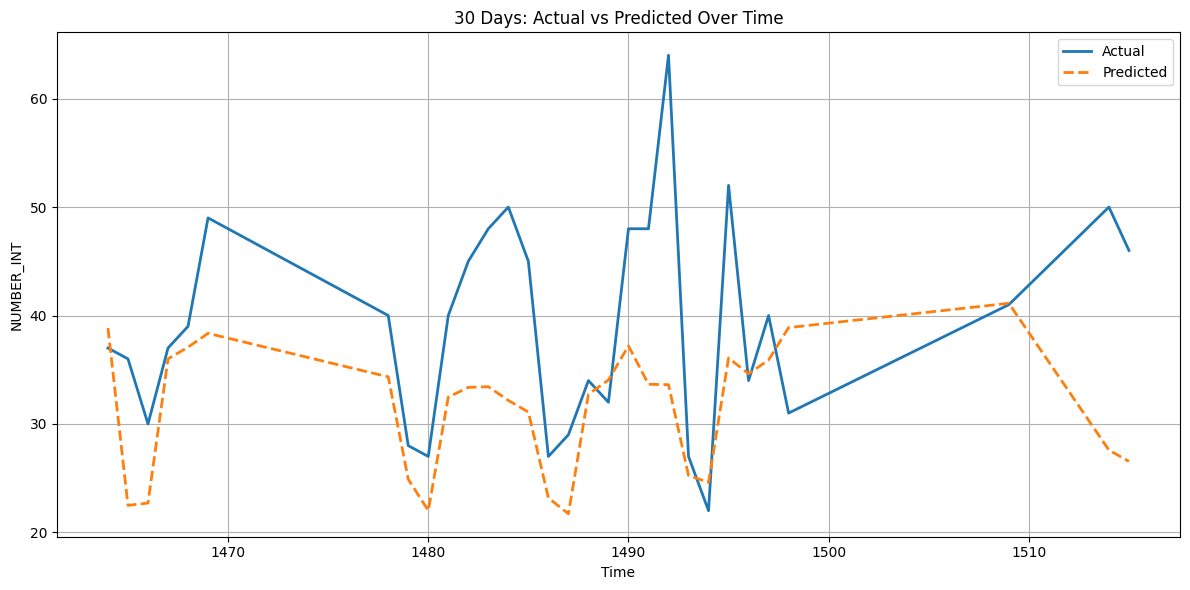

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(y_val.index[:30], y_val[:30].values, label='Actual', linewidth=2)
plt.plot(y_val.index[:30], y_pred_best[:30], label='Predicted', linewidth=2, linestyle='--')
plt.xlabel('Time')
plt.ylabel('NUMBER_INT')
plt.title('30 Days: Actual vs Predicted Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

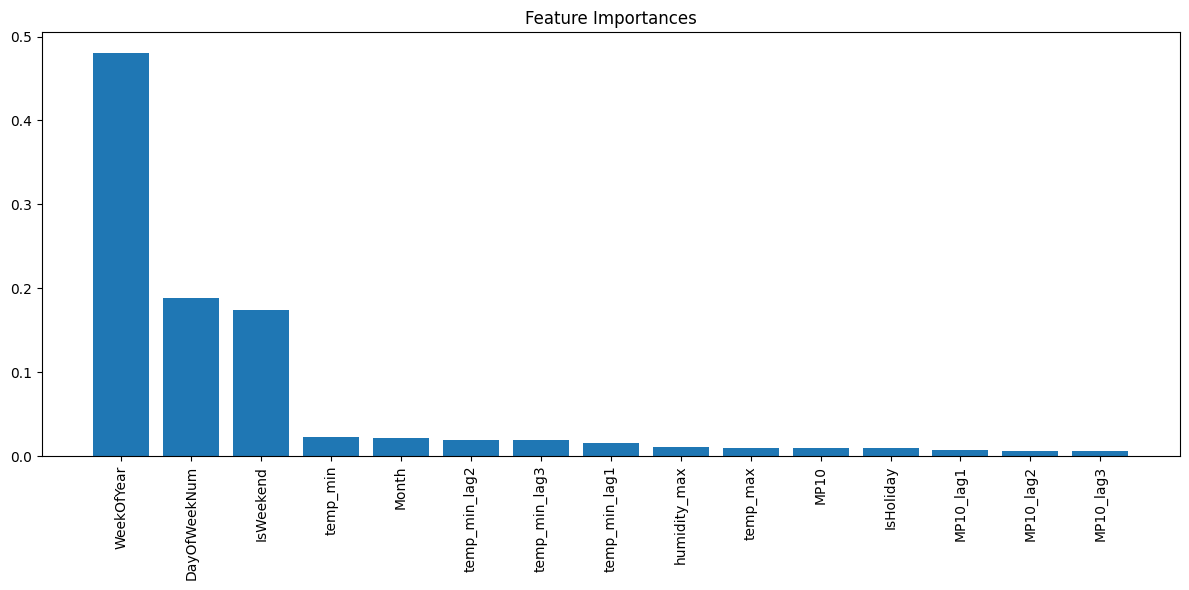

In [28]:
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()